In [ ]:
#linear regression

import tensorflow as tf

x = tf.constant([[1.9,1.2]])
print(x.shape)
print(x.dtype)


print(tf.concat([[[1,3]], [[2,6]]], axis=1))
tf.nn.softmax(x,axis=1)

y = tf.convert_to_tensor([1,2,3])
print(y)


(1, 2)
<dtype: 'float32'>
tf.Tensor([[1 3 2 6]], shape=(1, 4), dtype=int32)
tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [ ]:
var = tf.Variable([0.0,1.0,2.0,3.0])
va1 = tf.Variable(1.2)
print(va1)
var.assign([11.0,21.0,23.0,76.0]) # use assign to update the value of the variable in tf
print(var)
var.assign_add([1, 1, 1,2])

# both constant and variable forms a tensor but constant cant be updated later but variable can be updated

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.2>
<tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([11., 21., 23., 76.], dtype=float32)>


<tf.Variable 'UnreadVariable' shape=(4,) dtype=float32, numpy=array([12., 22., 24., 78.], dtype=float32)>

In [ ]:
# differentiation

x = tf.Variable(2.0)
p = tf.Variable(2.0)
k = 9.0
def f(u,p):
  y = 5 * u*u + 6 * u + 7*p *k         #5x^2 +6 after differentiation = 2 * 5 * x + 6
  print("value inside the function is ",y)
  return y

with tf.GradientTape(persistent = True, watch_accessed_variables=True) as tape : # with persistent = True , allows multiple calls to the gradient method as resources are released when the tape object is garbage collected. wihtout p= True , the gradient is calculated just for one gx and then gradient vector is garbage collected.and throws error : RuntimeError: A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)
  tape.watch([x,p]) # while x is a tf.Variable => we need to set the tape watch it, or else the derivative will be 0. # watch_accessed_variables=False , if set false then it wont watch for the variable whose gradient has to be taken will be considered as 0.
  #tape.watch(p)
                  # if x is not a tf.Variable then watch is no need
  z = f(x,p) # this will compute a vector like= (inverted traingle ) = [ dz/dx, dz/dp], so actually the tape.gradient (z,x) and (z,p) is decided by this statement
  print("z",z)


gx = tape.gradient(z,x)
px = tape.gradient(z,p)
print("px",px)
print("gx",gx)


value inside the function is  tf.Tensor(158.0, shape=(), dtype=float32)
z tf.Tensor(158.0, shape=(), dtype=float32)
px tf.Tensor(63.0, shape=(), dtype=float32)
gx tf.Tensor(26.0, shape=(), dtype=float32)


In [ ]:
d = tf.Variable([9.0])
g = tf.Variable([12.0])

def cal (s,d):
  c = s*s*s * 4 * 7 * d + d*d*7 + s*d
  return c


with tf.GradientTape(persistent = True , watch_accessed_variables = True) as tape:
  final = cal(d,g)

first_order = tape.gradient(final, d)
second_order = tape.gradient(first_order,g)
print(second_order)

None


In [ ]:
from tensorflow.python.eager.backprop import GradientTape
# second order derivative

z = tf.Variable(1.0)
def second(z):
  final = 3*z*z*z
  return final

with tf.GradientTape() as tape:
  #tape.watch(z)
  with tf.GradientTape() as tape2:
    f = second(z)
  df_dz= tape2.gradient(f,z)
  print(df_dz)
sec= tape.gradient(df_dz,z)
print(sec)

tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(18.0, shape=(), dtype=float32)


In [ ]:
a = tf.Variable(2.0)
def func(a):
  result = 4 * a * a * a
  return result

with GradientTape() as t1:
  with GradientTape() as t2:
    with GradientTape() as t3:
      r = func(a)
    dr = t3.gradient(r,a)
  dr2 = t2.gradient(dr,a)
dr3 = t1.gradient(dr2,a)

print(dr,dr2,dr3)


tf.Tensor(48.0, shape=(), dtype=float32) tf.Tensor(48.0, shape=(), dtype=float32) tf.Tensor(24.0, shape=(), dtype=float32)


In [ ]:
import tensorflow as tf

#linear regression with one value of x

# 1. define x and y
# 2. prdedict y
# 3. calculate loss
# 4. take the derivative of loss with respect to m and c


original_y = tf.Variable([8.0,3.0,2.0,7.0,1.0])
original_x = tf.Variable ([1.0,4.0,9.0,5.0,6.0])
m = tf.Variable (initial_value = 0.0,trainable= True)
c = tf.Variable (initial_value = 0.0,trainable = True)

# y = mx +c

def lossfunction(y_true,y_pred):
  loss= tf.reduce_sum(tf.square(y_true - y_pred))
  return loss

learning_rate = 0.001
def calculate_gradient(epochs,x):
  for i in range(epochs):
    with tf.GradientTape(persistent = True) as tape:
  # define m and c as constant
      y_pred = m * x + c
      #print("y_pred",y_pred)
      f = lossfunction(original_y, y_pred)
      #print("loss for the {} epoch is {}",i,f)
      dl_dm = tape.gradient(f,m)
      dl_dc = tape.gradient(f,c)
      print(dl_dm,dl_dc)
      #update m and c
      m.assign_sub(dl_dm * learning_rate)   ## Add 1 to the variable.  my_var.assign_add(1)
      c.assign_sub(dl_dc* learning_rate)

calculate_gradient(30,original_x)



#update m and c
# define learning rate
# define the epochs





tf.Tensor(-158.0, shape=(), dtype=float32) tf.Tensor(-42.0, shape=(), dtype=float32)
tf.Tensor(-105.656, shape=(), dtype=float32) tf.Tensor(-33.680004, shape=(), dtype=float32)
tf.Tensor(-70.37338, shape=(), dtype=float32) tf.Tensor(-28.060398, shape=(), dtype=float32)
tf.Tensor(-46.591625, shape=(), dtype=float32) tf.Tensor(-24.261124, shape=(), dtype=float32)
tf.Tensor(-30.562435, shape=(), dtype=float32) tf.Tensor(-21.688932, shape=(), dtype=float32)
tf.Tensor(-19.759138, shape=(), dtype=float32) tf.Tensor(-19.943924, shape=(), dtype=float32)
tf.Tensor(-12.478523, shape=(), dtype=float32) tf.Tensor(-18.756525, shape=(), dtype=float32)
tf.Tensor(-7.5725327, shape=(), dtype=float32) tf.Tensor(-17.945034, shape=(), dtype=float32)
tf.Tensor(-4.2672043, shape=(), dtype=float32) tf.Tensor(-17.386955, shape=(), dtype=float32)
tf.Tensor(-2.040884, shape=(), dtype=float32) tf.Tensor(-16.999725, shape=(), dtype=float32)
tf.Tensor(-0.54190445, shape=(), dtype=float32) tf.Tensor(-16.727684, sha

x_datatype <class 'numpy.ndarray'>
Epoch count 0: Loss value: 42091.8359375
Epoch count 1: Loss value: 1043.099853515625
Epoch count 2: Loss value: 25.86041259765625
Epoch count 3: Loss value: 0.6519173383712769
Epoch count 4: Loss value: 0.027194958180189133
Epoch count 5: Loss value: 0.011708931997418404
Epoch count 6: Loss value: 0.011320123448967934
Epoch count 7: Loss value: 0.011304831132292747
Epoch count 8: Loss value: 0.011298839934170246
Epoch count 9: Loss value: 0.011292893439531326
Epoch count 10: Loss value: 0.011287270113825798
Epoch count 11: Loss value: 0.01128118671476841
Epoch count 12: Loss value: 0.011275555938482285
Epoch count 13: Loss value: 0.011269810609519482
Epoch count 14: Loss value: 0.011263959109783173
Epoch count 15: Loss value: 0.011258108541369438
Epoch count 16: Loss value: 0.011252349242568016
Epoch count 17: Loss value: 0.011246495880186558
Epoch count 18: Loss value: 0.011240486055612564
Epoch count 19: Loss value: 0.011234985664486885


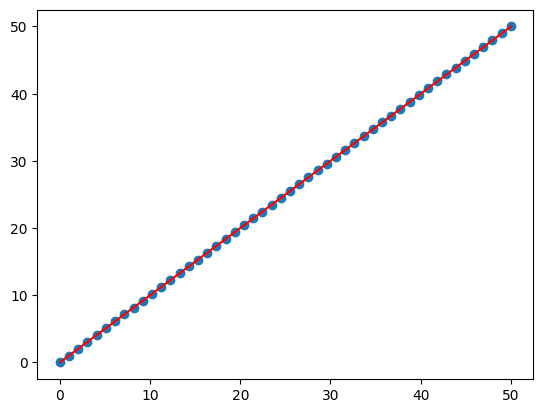

In [ ]:
# linear regression with multiple values of x

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
# np.random.seed(4)
tf.random.set_seed(101) # setting global seed for tensorflow

x_data = np.linspace(0,50,50)
print("x_datatype",type(x_data))

y_data = x_data
plt.scatter(x_data,y_data)

m = tf.Variable(initial_value = 0., trainable = True)
c = tf.Variable(initial_value = 0. , trainable = True)
learningrate = 0.00001

def linear_reg(x_train):
  lin = m * x_train + c
 # print("lin",lin)
  return lin

def lossfunction(y_true,y_pred):
  loss = tf.reduce_sum(tf.square(y_true - y_pred))
  return loss

def starttrain(epochs,x_data, y_data):
  for i in range(epochs):
    with tf.GradientTape(persistent = True) as tape:
      y_pred = linear_reg(x_data)
      loss = lossfunction(y_data, y_pred)
      gradients = tape.gradient(loss, [m,c])
      #print("gradient",gradients)
      m.assign_sub(gradients[0]* learningrate)
      c.assign_sub(gradients[1]*learningrate)
      #print("m",m)
      print(f"Epoch count {i}: Loss value: {loss.numpy()}")

starttrain(20,x_data,y_data)
plt.plot(x_data, linear_reg(x_data), 'r')
plt.show()


In [ ]:
def loss_func(y_pred,y_orig):
  lossvalue = tf.reduce_sum(tf.square(y_orig - y_pred))
  print("type of loss value just after the function",type(lossvalue))
  return lossvalue


y_pred after mx+c tf.Tensor([0. 0. 0. 0. 0.], shape=(5,), dtype=float32)
type <class 'tensorflow.python.framework.ops.EagerTensor'>
type of loss value just after the function <class 'tensorflow.python.framework.ops.EagerTensor'>
type of loss <class 'tensorflow.python.framework.ops.EagerTensor'>
loss for epoch i :0 is :127.0 
gradients [<tf.Tensor: shape=(), dtype=float32, numpy=-292.0>, <tf.Tensor: shape=(), dtype=float32, numpy=-42.0>]
y_pred after mx+c tf.Tensor([23.779999  9.179999 26.699999 20.859999 17.939999], shape=(5,), dtype=float32)
type <class 'tensorflow.python.framework.ops.EagerTensor'>
type of loss value just after the function <class 'tensorflow.python.framework.ops.EagerTensor'>
type of loss <class 'tensorflow.python.framework.ops.EagerTensor'>
loss for epoch i :1 is :1376.353759765625 
gradients [<tf.Tensor: shape=(), dtype=float32, numpy=1131.4799>, <tf.Tensor: shape=(), dtype=float32, numpy=154.91998>]
y_pred after mx+c tf.Tensor([-68.28758  -26.313595 -76.68238  -5

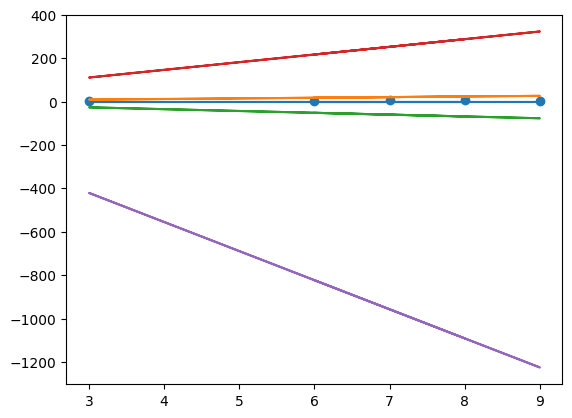

In [ ]:
# linear regression

# 1. define original x and original y
# 2. define loss function ,learning rate, epochs
# 3. calculate y = mx+c
# 4. update weights

import matplotlib.pyplot as plt
x_original = tf.Variable ([8.0,3.0,9.0,7.0,6.0])
y_original = tf.Variable([8.0,3.0,2.0,7.0,1.0])

plt.scatter(x_original,y_original)
def regression(epoch, x_value,y_orig):

  m = tf.Variable(initial_value = 0.0)
  c = tf.Variable(initial_value = 0.0 )
  learning_rate = 0.01
  for i in range(epoch):
    with tf.GradientTape(persistent = True) as tape:
      y_pred = m * x_value + c
      print("y_pred after mx+c", y_pred)
      plt.plot(x_original,y_pred)
      print("type",type(y_pred))
      loss = loss_func(y_pred,y_orig)
      print("type of loss",type(loss))
      print("loss for epoch i :{} is :{} ".format(i,loss))
      gradients = tape.gradient(loss,[m,c])
      print("gradients",gradients)
      m.assign_sub(gradients[0]* learning_rate)
      c.assign_sub(gradients[1]*learning_rate)


regression(5,x_original,y_original)





In [ ]:
c = tf.Variable(7.0)
d = tf.Variable(5.0)

def gradient_function(a,b):
  final = 2* c*c *c + 45 * d + c *d
  print("inside final",final)
  return final

#third order derivative
with tf.GradientTape(persistent = True) as tape:
  with tf.GradientTape() as tape1:
    with tf.GradientTape() as tape2:
      z = gradient_function(c,d)
    f1 = tape2.gradient(z,c)
  f2 = tape1.gradient(f1,c)
f3 = tape.gradient(f2,c)


#zc = tape.gradient(z,c) # first order derivative
#zc_two = tape.gradient(zc,c)
print("third order derivative",f3) # throws as none
#zd = tape.gradient(z,d)





In [ ]:
#logistic regression with one variable
import numpy as np
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy

def sigmoid_func(inputs):
  outputs = 1 / ( 1 + np.exp( -inputs ))
  print(outputs)
  return outputs

def crossentropyloss(logits,labels):
  cross_entropy_loss = CategoricalCrossentropy()
  loss = cross_entropy_loss(logits,labels).numpy()
  print("calculated loss",loss)
  return loss

x_val = tf.Variable([-3.0,2.0,-5.0,-7.0,5.0,-9.0,4.0,6.0],dtype=tf.float32)
y_val = tf.Variable([0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0],dtype=tf.float32)
learning_rate = 0.01
print(x_val)
def logits(epochs,x_val,y_val):
  m = tf.Variable(initial_value = 0.1)
  c = tf.Variable(initial_value = 0.1)
  for i in range(epochs):
    with tf.GradientTape(persistent = True) as tape:
      y_pred = (x_val * m) +c
      print("type of y_pred",y_pred)
      y_pred = sigmoid_func(y_pred)
      print("y_pred after sigmoid",y_pred)
      y_pred = [0 if y <= 0.5 else 1 for y in y_pred ]
      #y_pred = tf.Variable(y_pred)
      y_pred = tf.convert_to_tensor(y_pred)
      print("y_pred type after sigma",y_pred)
      loss = tf.convert_to_tensor(crossentropyloss(y_pred,y_val))
      print("type of loss",type(loss))
    gradients = tape.gradient(loss,[m,c])
    print('gradients',gradients)
    m.assign_sub(gradients[0]* learning_rate)
    c.assign_sub(gradients[1]*learning_rate)

logits (10,x_val,y_val)








In [ ]:
x= tf.constant([1.0,2.0,3.0,6.0],shape = [2,2])
y = tf.constant([2.0,9.0],shape = [2,1])
print(tf.matmul(x,y))


tf.Tensor(
[[20.]
 [60.]], shape=(2, 1), dtype=float32)


In [ ]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()# this data is in int , but have to convert into float since tensor takes float
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32) # convert into tensor
#print(x_train)
# x_val = tf.Variable(np.arange(10).reshape(-1, 1),dtype=tf.float32)
# y_val = tf.Variable(np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]),dtype=tf.float32)
# print(x_val)
# x_val = tf.convert_to_tensor(x_val,dtype=tf.float32)
# y_val = tf.convert_to_tensor(y_val,dtype=tf.float32)

[5 0 4 ... 5 6 8]


In [ ]:
class LogisticRegression():

  def __init__(self,learning_rate,iter):
    self.lr = learning_rate
    self.iters = iter
    self.slope = None
    self.bias = None

  def sigmoid_func(self,inputs):
    outputs = 1 / ( 1 + np.exp( -inputs ))
    return outputs

  def crossentropy_loss(self,logits,labels)  :
    cross_entropy_loss = CategoricalCrossentropy()
    loss = tf.reduce_mean(cross_entropy_loss(logits,labels))
    print(type(loss))
    return loss


  def fit(self, x_train, y_train):
    self.slope = tf.Variable(initial_value = 0.1,trainable = True)
    self.bias = tf.Variable(initial_value = 0.1,trainable = True)
    for i in range(self.iters):
      with tf.GradientTape (persistent = True) as tape:
        y_pred = (self.slope * x_train ) + self.bias
        y_pred = self.sigmoid_func(y_pred)
        #y_pred = tf.convert_to_tensor(y_pred)
        y_pred = tf.Variable([0.0 if y <=0.5 else 1.0 for y in y_pred ])
        #y_pred = tf.convert_to_tensor(y_pred)
        print("y_pred type after sigma",y_pred)
        loss = self.crossentropy_loss(y_pred,y_pred)
        print("loss is ",loss)

      gradients = tape.gradient(loss,[self.slope,self.bias])
      self.slope.assign_sub(gradients[0]* self.lr)
      self.bias.assign_sub(gradients[1]* self.lr)

x_val = tf.Variable([-1.0,-2.0,4.0,-3.0,7.0])
y_val = tf.Variable([0.0,0.0,1.0,0.0,1.0])
learning_rate = 0.01
logistic = LogisticRegression(learning_rate , 5)
logistic.fit(x_val,y_val)






In [ ]:
#Tensorflow graphs

# define a regular function
import tensorflow as tf
def regular_function(x,y): #this will be called by the outer function and will be a part of the graph
  c = tf.matmul(x,y)
  return c

a_function_using_graph = tf.function(regular_function)
x = tf.Variable([[2.0,1.0]])
y = tf.Variable([[3.0],[4.0]])
reg = regular_function(x,y)
tf_func = a_function_using_graph(x,y)
assert(reg==tf_func) #The assert keyword is used when debugging code.It lets you test if a condition in your code returns True, if not, the program will raise an AssertionError


# define a inner function called by a regular function and tf.function will form a graph when you call a outer function, use a decorator

def inner_function(x,y):
  return tf.matmul(x,y)

@tf.function #builds python graphs from functions
def outer_function(x,y,d):
  c = inner_function(x,y)
  ans = c + d #+ tf.Variable([8.0]) # creating a tf.variable here is not recommended
  return ans

x = tf.Variable([[1.0,2.0]])
y = tf.Variable([[3.0],[7.0]])
d = tf.Variable([9.0])

ans = outer_function(x,y,d)
print(ans)

@tf.function
def second_trial(x,y):
  ans = x+y
  return ans

i= second_trial(x,y)
print(i)
tf.config.run_functions_eagerly(True) #this will make function execute eagerly and turns off the ability of a function to create and run graphs.
# Don't forget to set it back when you are done.
tf.config.run_functions_eagerly(False)
outer_function(x,y,d)
second_trial(x,y)




tf.Tensor([[26.]], shape=(1, 1), dtype=float32)
tf.Tensor(
[[4. 5.]
 [8. 9.]], shape=(2, 2), dtype=float32)


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 5.],
       [8., 9.]], dtype=float32)>

In [ ]:
import inspect

@tf.function()
def autograph_test(x,y,c):
  if c == 1:
    return x+y
  else:
    return x-y

x = tf.Variable([[1.0,2.0]])
y = tf.Variable([[3.0],[7.0]])
c = 1
tf.config.run_functions_eagerly(True)
#converted_g = tf.autograph.to_graph(autograph_test) # works only for python function
#print(inspect.getsource(coverted_g))
#print(inspect.getsource(converted_cube))
autograph_test(x,y,c)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 5.],
       [8., 9.]], dtype=float32)>

In [ ]:
# K means

import math
dataset = [[5.13,88],
[5.9,113],
[8.36,93],
[8.27,97],
[5.45,110],
[5.88,109],
[8.41,98],
[3.12,1.21]]
k = 2
centroid = [[10,11],[8,10]]

class Kmeans():
  def __init__(self,k,centroid,dataset,iter):
    self.k = k
    self.dataset = dataset
    self.centroid = centroid
    self.iteration = iter


  def find_distance(self,data):
    iter = 0
    euc_distance = float("inf")
    for k in range(len(self.centroid)):
      distance = math.sqrt(((data[0]- self.centroid[k][0])**2) + ((data[1] -self.centroid[k][1])**2))
      print(k,distance)
      if distance < euc_distance :
        euc_distance = distance
        iter = k
        #print("inside iter",iter,euc_distance)
    #print(iter)
    return iter, euc_distance


  def fit(self):

    for j in range(self.iteration):
      groups = [[] for i in range(self.k)]
      distance = 0
      for i in range(len(self.dataset)):
        iter, distance = self.find_distance(self.dataset[i])
        groups[iter].append(i)
      print("groups",groups)
      #update centroids:
      for k in range(len(groups)):
        x = 0; y=0
        for val in groups[k]:
          x+= self.dataset[val][0]
          y+= self.dataset[val][1]
        x = x /len(groups[k])-1
        y = y /len(groups[k])-1
        self.centroid[k] = [x,y]
      #print(self.centroid)

kmean = Kmeans(k,centroid,dataset,3)
kmean.fit()













0 77.15385213973441
1 78.05278278190983
0 102.08236870292538
1 103.02140554273174
0 82.01639836032791
1 83.00078071921975
0 86.01739882140124
1 87.00041896450844
0 99.10450292494282
1 100.03250721640441
0 98.08656584874403
1 99.02269638825233
0 87.01452809732407
1 88.00095510845323
0 11.96572187542398
1 10.053780383517436
groups [[0, 1, 2, 3, 4, 5, 6], [7]]
0 12.159786601913765
1 87.8415858235722
0 12.857785698215093
1 112.85332294620305
0 7.597441029983817
1 92.9995790313053
0 4.01502306395388
1 96.98518752881803
0 9.862382147972829
1 109.84048889184717
0 8.857808269935562
1 108.8549571677836
0 3.399102222406282
1 97.99208233321711
0 98.96838028339339
1 1.4142135623730951
groups [[0, 1, 2, 3, 4, 5, 6], [7]]
0 12.159786601913765
1 87.8415858235722
0 12.857785698215093
1 112.85332294620305
0 7.597441029983817
1 92.9995790313053
0 4.01502306395388
1 96.98518752881803
0 9.862382147972829
1 109.84048889184717
0 8.857808269935562
1 108.8549571677836
0 3.399102222406282
1 97.99208233321711
0

In [ ]:
# knn algorithm

class KNN():
  def __init__(self,iter,dataset):
    self.iter = iter
    self.dataset = dataset

  def find_distance(self,dataset,datapoint,mark):
    mylist = []
    if mark == "r":
       for i in dataset:
      #euclidean distance
          d = math.dist(dataset[i],datapoint)
          mylist.append(d)
       print(mylist)
       return mylist
    else:
      mydict = {}
      final_list=[]
      for i in dataset:
        d = math.dist(dataset[i],datapoint)
        mydict[str(d)] = i
      mylist = ()
      for k in mydict.keys():
        mylist.append(int(k))
      mylist = mylist.sort()
      for i in mylist[:10]:
        final_list.append(mydict[str(i)])
      print(final_list)
      return final_list

  def classification_fit(self,datapoint):
    groups = self.find_distance(self.dataset,datapoint,"c")
    max_dict ={}
    for k in groups:
      max_dict[str(k)] = max_dict.get(str(k),1)+1
    class_ = float('-inf')
    classifier= ""
    for i in max_dict:
      if max_dict[i] > class_:
        class_ = max_dict[i]
        classifier = i
    return classifier

  def regression_fit(self,datapoint):
    distances = find_distance(self.dataset,datapoint,"r")
    d = distances.sort()
    distances = d[:10]
    sum = 0
    for k in distances :
      sum+=k
    mean_value = sum/len(distances)-1
    return mean_value


# data needs to be formed




In [ ]:
tensor = tf.constant([[1.0,2.0,3.0,4.0]])
print(tensor)

tf.Tensor([[1. 2. 3. 4.]], shape=(1, 4), dtype=float32)


In [ ]:
# neural network sequential network
import tensorflow as tf
import keras
from keras import layers

#first method

model = keras.Sequential([

    layers.Dense(2,activation="relu",name = "l1",use_bias = True, input_shape=(4,)),
    layers.Dense(3,activation = "relu",name = "l2"),
    layers.Dense(5,activation ="relu",name = "l3")
]

)

print(model.summary())  #cant be called here since the layer weights are not initialised yet , if input shape is give then it can be called

x = tf.constant([[1.0,9.0,8.0,10.9],[1.2,3.4,6.8,9.0]])
y = model(x)
print(y)
print("model layers",model.layers) # only give give the layer object

model.pop() # will pop the last layer
print(model.summary())


#second method


layer1 = layers.Dense(2,activation="relu",use_bias = True)
layer2 = layers.Dense(5,activation="relu",use_bias = True)
layer3 = layers.Dense(5,activation ="relu",use_bias = True)
input = tf.constant ([[1.2,3.4,5.6,7.8]])
output = layer1(layer2((layer3(input))))
#print("output",output)

# third method

model2 = keras.Sequential()
model2.add(layers.Dense(2,activation = "relu",input_shape = (4,)))
model2.add(layers.Dense(3,activation ="relu"))
input = tf.constant([[1.2,3.4,5.6,7.8]])
y = model2(input)
print("third model output",y)
print("third model summary",model2.summary())




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 2)                 10        
                                                                 
 l2 (Dense)                  (None, 3)                 9         
                                                                 
 l3 (Dense)                  (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
tf.Tensor(
[[0.         1.3053958  0.         3.5114527  0.76684964]
 [0.         1.378572   0.         3.708293   0.8098366 ]], shape=(2, 5), dtype=float32)
model layers [<keras.src.layers.core.dense.Dense object at 0x7f03f821e950>, <keras.src.layers.core.dense.Dense object a

In [ ]:
# feature extractor
feature_extractor = keras.Model(inputs = model.input,outputs = [layer.output for layer in model.layers])
x= tf.ones((1,4))
features = feature_extractor(x)



print("model input",model.inputs)
for layer in model2.layers:
  print("layer output feature extractor",layer.output)



model input [<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'l1_input')>]
layer output feature extractor KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='dense_3/Relu:0', description="created by layer 'dense_3'")
layer output feature extractor KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='dense_4/Relu:0', description="created by layer 'dense_4'")


In [ ]:
"""First, we want to decide a model architecture, this is the number of hidden layers and activation functions, etc. (compile)
Secondly, we will want to train our model to get all the paramters to the correct value to map our inputs to our outputs. (fit)
Lastly, we will want to use this model to do some feed-forward passes to predict novel inputs. (predict)"""

from keras import layers

base_model = keras.applications.Xception(
    weights='imagenet',
    include_top=False,
    pooling='avg')


# freeze the base model
base_model.trainable = False

# add a classifier on top

model = keras.Sequential([base_model,layers.Dense(100)])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adadelta(),
#               metrics=['accuracy'])

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print("train images shape",train_images.shape)

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(28,28,1)/255.0
test_images = test_images[:1000].reshape(28,28,1)/255.0


print(train_images[0].shape)


model.fit(train_images,
          train_labels,
          epochs=10,
          validation_data=(test_images, test_labels))




In [ ]:
#functional api

layer_inputs = keras.Input(shape=(32,32,3))
dense_layer = layers.Dense(64, activation= "relu")(layer_inputs)
#x = dense_layer(layer_inputs)
dense_layer2 = layers.Dense(32,activation = 'relu')(dense_layer)
layers_outputs = layers.Dense(10,activation="relu")(dense_layer2)


model = keras.Model(inputs = layer_inputs,outputs = layers_outputs,name = "funcapi_model")
model.summary()

# view the model graph
keras.utils.plot_model(model,"my_first_model.png", show_shapes = True)

# save the model
save_dir = "modelsave "
model.save(save_dir)
model_recreate = keras.models.load_model(save_dir)

Model: "funcapi_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_40 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 dense_65 (Dense)            (None, 32, 32, 64)        256       
                                                                 
 dense_66 (Dense)            (None, 32, 32, 32)        2080      
                                                                 
 dense_67 (Dense)            (None, 32, 32, 10)        330       
                                                                 
Total params: 2666 (10.41 KB)
Trainable params: 2666 (10.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#model layer input and output

x = keras.Input(shape = (32,))
y = tf.square(x)
model = keras.Model(x,y)
print(model)

#building an autoencoder

#1. define the input
#2. pass the input to the layers
#3. create more layers and keep passing the output from prev layers
#4. final layer = output layer
#5. create an encoder model , model (input,output), similarly create a decoder model (input,output)
#6. finally form the autoencoder model with initial input and decoder output



input = keras.Input(shape = (28,28,1),name = "input_image")
layer1 = layers.Conv2D(16,3,activation = "relu")(input)
layer2 = layers.Conv2D(32,3,activation = "relu")(layer1)
layer3 = layers.MaxPooling2D(3)(layer2)
layer4 = layers.Conv2D(32, 3, activation="relu")(layer3)
print("hello how are you")
x = layers.Conv2D(16, 3, activation="relu")(layer4)
encoder_output = layers.GlobalMaxPooling2D()(x)

model_encoder = keras.Model(input, encoder_output,name = "encoder")

model_encoder.summary()

x = layers.Reshape((4,4,1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)

decoded_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(input, decoded_output,name = "autoencoder")
autoencoder.summary()

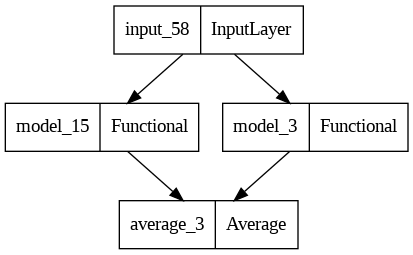

In [ ]:
# ensemble method

def get_model():
  input = keras.Input(shape = (32,))
  l1 = layers.Dense(1, activation = "relu")(input)
  return keras.Model(input,l1)

model1 = get_model()
model2 = get_model()
model3 = get_model()

input = keras.Input(shape = (32,))
m1 = model1(input)
m2 = model(input)
m3 = model(input)

avg_output = layers.average ([m1,m2,m3])
ensemble_model = keras.Model(input,avg_output)

keras.utils.plot_model(ensemble_model, "ensemble_model.png")

In [ ]:
#creating custom layers

#1. create a init inheriting the super class
#2. define a build function which defines weights and bias
#3. define a call function which does the computation of y = mx+c

import tensorflow as tf
from tensorflow.keras.layers import Layer

class LinearLayer(Layer):
  def __init__(self,units):
    super().__init__()
    self.units = units

  def build(self,input_dim):
    print("inside build")
    self.w = self.add_weight(shape = (input_dim[-1],self.units), initializer = "random_normal", trainable = True)

    self.b = self.add_weight(shape = (self.units), initializer = "zeros", trainable = True)

  # def build(self, input_shape):
  #       print("input shape",input_shape[-1])
  #       self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer="random_normal",trainable=True)
  #       print(self.w)
  #       self.b = self.add_weight(shape=(self.units,), initializer="random_normal", trainable=True)

  def call(self,inputs):
    print("inside call")
    return tf.matmul(inputs,self.w) + self.b


x = tf.Variable([[1.0,9.9,8.9,8.0],[1.0,9.0,8.0,7.0]])
my_dense = LinearLayer(32)
y = my_dense(x)
print(y)





inside build
inside call
tf.Tensor(
[[-0.29458985  0.67746204  0.24582252  0.5756243  -0.1665802   1.2022898
   1.0581698   0.8431879   0.21619546 -0.29535294  0.30970666  1.1614864
  -0.60758984  0.7829623  -0.8511929   1.1321393  -1.5717382   0.10532276
  -1.4805467   0.3249231  -1.3684015   0.43659276 -0.34927192 -0.8905678
  -0.65061307 -0.00406966  0.13335873  0.7793991   0.8221552   0.03125322
   0.908846    1.062352  ]
 [-0.26317352  0.5800192   0.20293593  0.51052725 -0.12816678  1.082042
   0.9557084   0.75925463  0.18095973 -0.2385177   0.28311837  1.0531989
  -0.55653965  0.7044104  -0.76982856  1.0107841  -1.4167535   0.07738574
  -1.3437084   0.299949   -1.2395246   0.4100952  -0.30964208 -0.79474187
  -0.58211404 -0.01257256  0.11296719  0.70772946  0.72746277  0.03698057
   0.8314443   0.9482571 ]], shape=(2, 32), dtype=float32)


In [ ]:
import keras
import tensorflow as tf

class Linear(keras.layers.Layer):
    def __init__(self, units=32):
        super().__init__()
        print("inside init")
        self.units = units

    def build(self, input_shape):
        print("input shape",input_shape[-1])
        self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer="random_normal",trainable=True)
        print(self.w)
        self.b = self.add_weight(shape=(self.units,), initializer="random_normal", trainable=True)

    def call(self, inputs):
        print("inside call function")
        return tf.matmul(inputs, self.w) + self.b

x = tf.ones((2, 2))
print(x)
linear_layer = Linear(32)

# The layer's weights are created dynamically the first time the layer is called
y = linear_layer(x)
print(y)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
inside init
input shape 2
<tf.Variable 'linear_8/Variable:0' shape=(2, 32) dtype=float32, numpy=
array([[-0.05396628, -0.05686462, -0.07670227, -0.01159141, -0.01400912,
        -0.03874153, -0.02423155,  0.00746136, -0.0519442 ,  0.03725116,
        -0.03275495, -0.01593868, -0.09681412,  0.09804141, -0.02609902,
        -0.04610913, -0.00788931, -0.03318901,  0.0128896 ,  0.00752461,
        -0.03992972, -0.01647343, -0.09584283, -0.01427616,  0.03648385,
        -0.00979629, -0.07778927,  0.00967569, -0.05161257,  0.05850982,
        -0.0700458 ,  0.04141715],
       [ 0.01521337, -0.0692622 , -0.00586403,  0.06192854, -0.06085361,
         0.05151749,  0.04016273,  0.04902179, -0.0316957 , -0.02678572,
        -0.07350702,  0.00194111,  0.00724326,  0.00018016, -0.00468301,
         0.07554858,  0.00900036,  0.12423038, -0.01758913, -0.0190443 ,
         0.04454306, -0.0562568 ,  0.0632298 , -0.03563019, -0.0873142 ,
     